# Classification model using KNNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload RNA data

In [2]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_24_genes_12_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,BAP1,EPAS1,MTOR,NF2,PIK3CA,PTEN,PTGS2,RNF139,SETD2,TP53,TSC1,VHL,Y
0,0,33.677294,37.95811,33.01718,33.96080,32.42544,36.73944,31.08504,32.46554,32.58565,33.83518,32.93402,32.30615,1
1,1,32.643149,38.83281,33.17883,33.69899,33.21465,37.13114,30.16993,32.27190,33.19915,34.44810,33.16630,32.19988,1
2,2,32.368866,37.19345,34.06093,34.07472,32.46705,37.91878,30.76766,32.55514,32.84628,35.41980,33.63282,31.49147,1
3,3,31.895400,39.46713,33.50445,33.14612,33.87549,37.77827,30.54053,33.19823,33.68316,34.18862,32.88250,32.11538,0
4,4,33.968348,38.49884,34.22502,32.58079,34.24976,37.99008,30.95478,30.89813,34.63036,34.91241,33.44515,33.33646,1


In [3]:
X = data.iloc[:,1:13  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

          BAP1     EPAS1      MTOR       NF2    PIK3CA      PTEN     PTGS2  \
0    33.677294  37.95811  33.01718  33.96080  32.42544  36.73944  31.08504   
1    32.643149  38.83281  33.17883  33.69899  33.21465  37.13114  30.16993   
2    32.368866  37.19345  34.06093  34.07472  32.46705  37.91878  30.76766   
3    31.895400  39.46713  33.50445  33.14612  33.87549  37.77827  30.54053   
4    33.968348  38.49884  34.22502  32.58079  34.24976  37.99008  30.95478   
..         ...       ...       ...       ...       ...       ...       ...   
176  33.843872  39.13826  33.84510  33.58214  32.89218  37.99666  30.11854   
177  32.519967  35.86338  32.98942  33.10420  33.35177  34.65038  31.17902   
178  33.115209  37.91340  34.30048  33.80118  32.93922  36.77314  33.02287   
179  32.895151  37.96870  32.81197  33.51366  32.59420  36.08937  31.14709   
180  33.404526  38.75226  33.43997  33.67890  32.98728  36.87734  34.94678   

       RNF139     SETD2      TP53      TSC1       VHL  
0    32

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 4 and is: 0.5405


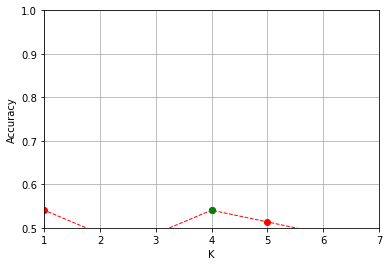

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000001B784CCF3A0>,
                     n_neighbors=4)

### 6. Predictions

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,0,0
2,0,0,0
3,1,1,1
4,0,1,1


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters:0.5413793103448276
Best result of the cross validation of the model (manhattan) with the best paramters:0.5211822660098523


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.7291666666666666
Final accuracy on the testing dataset (manhattan): 0.5135135135135135


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[57 11]
 [28 48]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75        68
           1       0.81      0.63      0.71        76

    accuracy                           0.73       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.75      0.73      0.73       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[12  5]
 [13  7]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.48      0.71      0.57        17
           1       0.58      0.35      0.44        20

    accuracy                           0.51        37
   macro avg       0.53      0.53      0.50        37
weighted avg       0.54      0.51      0.50        37

